## Importing All Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
# this code helps us to run two outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading The Data

In [ ]:
# load the data and set PassengerID as index
df_train = pd.read_csv('train.csv').set_index('PassengerId')
df_test = pd.read_csv('test.csv').set_index('PassengerId')
data = [df_train, df_test]

## Exploratory Data Analysis

In [5]:
# lets go through the train data and get some high-level information
df_train.describe(include='all')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Cherry, Miss. Gladys",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# lets add the Title and Family name features.
# this will help us to identify all memebrs belong to the same family and childern (< 16 years old).

for dataset in data:
    #extract the titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # extract the family names
    dataset['Family_Name'] = dataset.Name.str.split(',').str[0]
    # replace the title with common one
    dataset['Title'] = dataset['Title'].replace(["Capt","Don","Major","Col","Rev","Dr","Sir","Mr","Jonkheer"], 'Man')
    dataset['Title'] = dataset['Title'].replace(["Dona","Mme","Mlle","Ms","Miss","Lady","Mrs","Countess"], 'Woman')
    dataset['Title'] = dataset['Title'].replace('Master', 'Child')

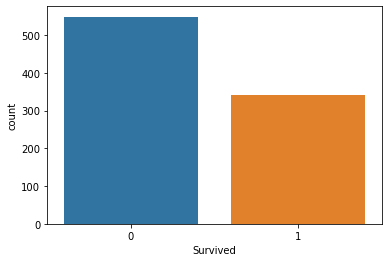

In [9]:
# Let's see the survival rate
sns.countplot(x='Survived', data=df_train)

In [10]:
# Survived per Embarked
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


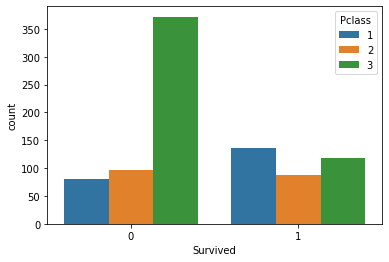

In [11]:
#Survived per Pclass
sns.countplot(x='Survived',hue="Pclass", data=df_train)

#The first class twice likely to servive, the lowest class likely to not survive

,Title,Survived
2,Woman,0.741214
0,Child,0.575000
1,Man,0.161710


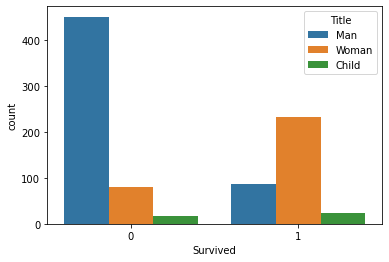

In [12]:

sns.countplot(x='Survived',hue="Title", data=df_train)
df_train[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [13]:

femaleOrchild = df_train[(df_train['Title'] == 'Woman') | (df_train['Title']== 'Child')]
male = df_train[df_train['Title']== 'Man']

femaleOrchild_ns = femaleOrchild[femaleOrchild['Survived'] == 0]
male_s = male[male['Survived'] == 1]

femaleOrchild_ns.describe(include='all')
male_s.describe(include='all')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
count,98.0,98.000000,98,98,79.000000,98.000000,98.000000,98,98.000000,6,98,98,98
unique,NaN,NaN,98,2,NaN,NaN,NaN,61,NaN,4,3,2,58
top,NaN,NaN,"Allison, Miss. Helen Loraine",female,NaN,NaN,NaN,347082,NaN,C22 C26,S,Woman,Andersson
freq,NaN,NaN,1,81,NaN,NaN,NaN,6,NaN,2,76,81,6
mean,0.0,2.877551,NaN,NaN,21.316456,1.724490,1.112245,NaN,25.263183,NaN,NaN,NaN,NaN
std,0.0,0.412818,NaN,NaN,14.564000,2.054819,1.291388,NaN,23.561380,NaN,NaN,NaN,NaN
min,0.0,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,6.750000,NaN,NaN,NaN,NaN
25%,0.0,3.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,9.828125,NaN,NaN,NaN,NaN
50%,0.0,3.000000,NaN,NaN,21.000000,1.000000,1.000000,NaN,21.037500,NaN,NaN,NaN,NaN
75%,0.0,3.000000,NaN,NaN,30.250000,3.000000,2.000000,NaN,30.737500,NaN,NaN,NaN,NaN


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
count,87.0,87.000000,87,87,73.000000,87.000000,87.000000,87,87.000000,39,87,87,87
unique,NaN,NaN,87,2,NaN,NaN,NaN,81,NaN,36,3,1,86
top,NaN,NaN,"Wilhelms, Mr. Charles",male,NaN,NaN,NaN,1601,NaN,E25,S,Man,Daly
freq,NaN,NaN,1,86,NaN,NaN,NaN,5,NaN,2,60,87,2
mean,1.0,1.919540,NaN,NaN,34.273973,0.241379,0.103448,NaN,42.507617,NaN,NaN,NaN,NaN
std,0.0,0.955016,NaN,NaN,11.957402,0.481411,0.374616,NaN,77.782923,NaN,NaN,NaN,NaN
min,1.0,1.000000,NaN,NaN,16.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,1.0,1.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN
50%,1.0,2.000000,NaN,NaN,32.000000,0.000000,0.000000,NaN,26.387500,NaN,NaN,NaN,NaN
75%,1.0,3.000000,NaN,NaN,42.000000,0.000000,0.000000,NaN,52.554200,NaN,NaN,NaN,NaN


In [14]:

femaleOrchild_ns.groupby(['Pclass'], as_index=False).count()
male_s.groupby(['Pclass'], as_index=False).count()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
0,1,3,3,3,3,3,3,3,3,3,3,3,3
1,2,6,6,6,6,6,6,6,6,1,6,6,6
2,3,89,89,89,70,89,89,89,89,2,89,89,89


,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
0,1,43,43,43,38,43,43,43,43,37,43,43,43
1,2,8,8,8,6,8,8,8,8,1,8,8,8
2,3,36,36,36,29,36,36,36,36,1,36,36,36


In [16]:
family_avg_sv=femaleOrchild[['Family_Name', 'Survived']].groupby('Family_Name').mean().sort_values(by='Survived', ascending=True)
family_avg_sv[family_avg_sv['Survived'].between(0.1,0.9)]

,Survived
Family_Name,
Andersson,0.142857
Allison,0.333333
Carter,0.750000
Asplund,0.750000


## 5- Engineering Features

In [17]:
# add both train and test data into one dataframe 
df = pd.concat([df_train,df_test], axis=0, sort=False)

In [18]:
df['ISfemaleOrchild'] = ((df['Title']=='Child') | (df['Title']=='Woman'))

In [19]:
family = df.groupby(df.Family_Name).Survived

In [20]:
df['FamilyCount'] = family.transform(lambda s: s[df.ISfemaleOrchild].fillna(0).count())

In [21]:
df['FamilyCount'] = df.mask(df.ISfemaleOrchild, df.FamilyCount - 1, axis=0)

In [22]:
df['FamilySurvived'] = family.transform(lambda s: s[df.ISfemaleOrchild].fillna(0).sum())

In [23]:
df['FamilySurvived'] = df.mask(df.ISfemaleOrchild, df.FamilySurvived - df.Survived.fillna(0), axis=0)

In [24]:
df['FamilySurvivalRate'] = (df.FamilySurvived / df.FamilyCount.replace(0, np.nan))

In [25]:
df['IsSinglePas'] = df.FamilyCount == 0

In [26]:
df_train['Embarked'].value_counts()
# we can see S (Southamption) is the most common

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df['Embarked'].fillna('S', inplace=True)

## 6- Create Random Forest  Models

In [28]:
X = pd.concat([
    df.FamilySurvivalRate.fillna(0),
    df.IsSinglePas,
    # relplace categorical varibales with numbers
    df.Title.replace({'Woman': 0, 'Man': 1, 'Child': 2}),
    df.Embarked.replace({'S': 0, 'Q': 1, 'C': 2 }),
], axis=1)
X.head(2)

,FamilySurvivalRate,IsSinglePas,Title,Embarked
PassengerId,,,,
1,0.0,True,1,0
2,0.0,True,0,2


In [29]:
train_x, test_x = X.loc[df_train.index], X.loc[df_test.index]

In [30]:
train_y = df.Survived.loc[df_train.index]

In [31]:
#Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
y_rfpredict = random_forest.predict(test_x).astype(int)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

RandomForestClassifier()

92.82

## 7- export the csv file

In [33]:
pd.DataFrame({'Survived': y_rfpredict}, index=df_test.index).reset_index().to_csv('survived.csv', index=False)